# **HEART DISEASE PRIDECTION**

First, we need to import all the libraries required

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt



Problem statement- You have just been hired at a Hospital with an alarming number of patients coming in reporting various cardiac symptoms. A cardioligist measures vitals & hands you this data to peform Data Analysis and predict whether certain patients have Heart Disease.

**IMPORT DATA FROM CSV FILE TO DATA FRAME USING PANDAS** 

In [ ]:
data = pd.read_csv('/content/heartDisease.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


lets know about features used to predict heart disease

Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X)

age (#)


sex : 1= Male, 0= Female (Binary)

(cp)chest pain type (4 values -Ordinal):Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic 

(trestbps) resting blood pressure 

(chol) serum cholestoral in mg/dl 

(fbs)fasting blood sugar > 120 mg/dl(Binary)(1 = true; 0 = false)

(restecg) resting electrocardiographic results(values 0,1,2)

(thalach) maximum heart rate achieved

(exang) exercise induced angina (binary) (1 = yes; 0 = no)

(oldpeak) = ST depression induced by exercise relative to rest 

(slope) of the peak exercise ST segment (Ordinal) (Value 1: upsloping , Value 2: flat , Value 3: downsloping 

(ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy

(thal) maximum heart rate achieved - (Ordinal): 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


summarizes the count, mean, standard deviation, min, and max for numeric variables.

In [ ]:
#Display the Missing Values

print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


So, as we see in above result we do not have any missing values t be covered so there is no stratergy applied to fill the missing values.

# **Exploratory Data Analysis**

Correlation Matrix- let's you see correlations between all variables. Within seconds, you can see whether something is positivly or negativly correlated with our predictor (target)

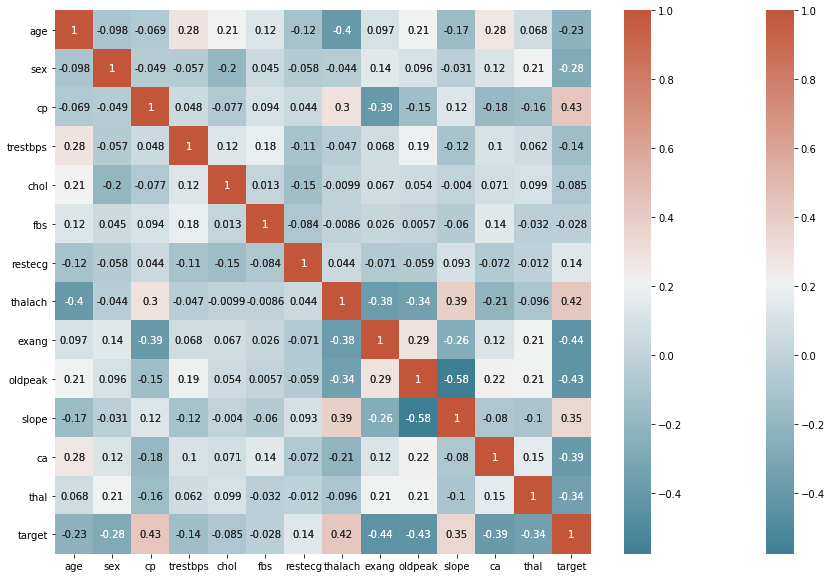

In [ ]:
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

We can see there is a positive correlation between chest pain (cp) & target (our predictor). This makes sense since, The greater amount of chest pain results in a greater chance of having heart disease. Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.

In addition, we see a negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.

**PAIR PLOTS**

Pairplots are also a great way to immediatly see the correlations between all variables. But you will see me make it with only continous columns from our data, because with so many features, it can be difficult to see each one. So instead I will make a pairplot with only our continous features.

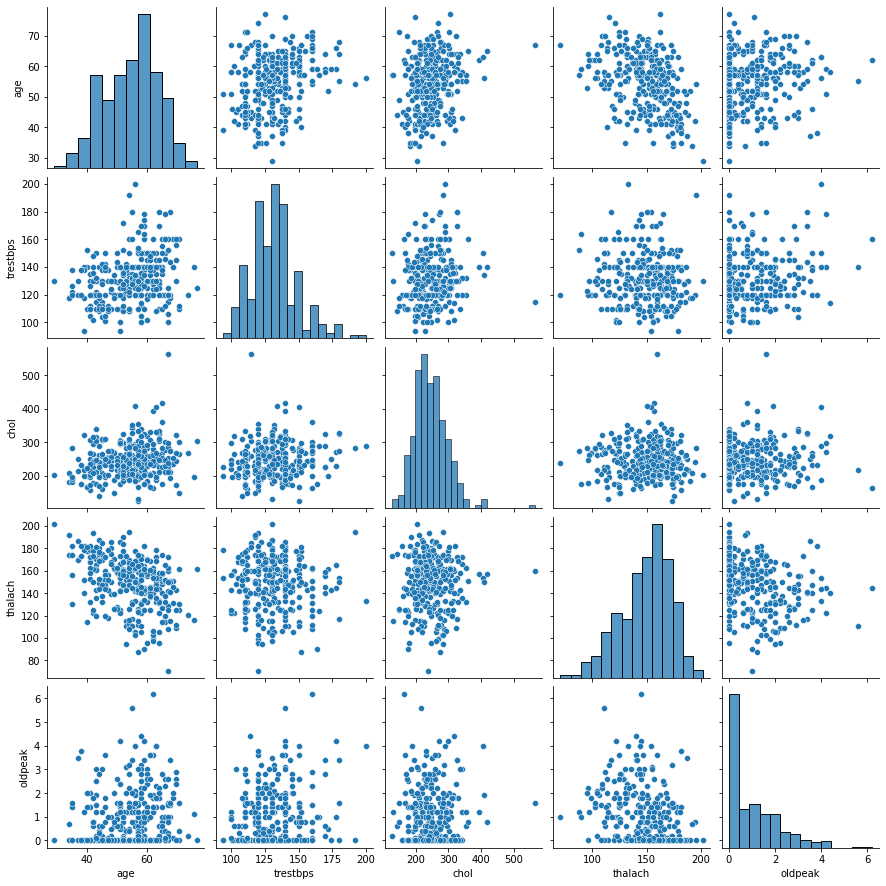

In [ ]:
subData = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

 We chose to make a smaller pairplot with only the continus variables, to dive deeper into the relationships. Also a great way to see if theirs a positve or negative correlation!

Text(10.778541666666662, 0.5, 'ST depression')

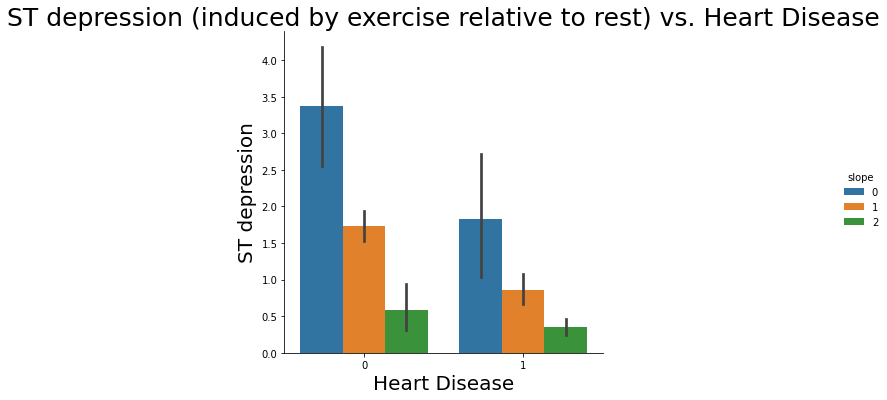

In [ ]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. This is supports the plot above because low ST Depression yields people at greater risk for heart disease. While a high ST depression is considered normal & healthy. The "slope" hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.

**Violin & Box Plots**: The advantages of showing the Box & Violin plots is that it showsthe basic statistics of the data, as well as its distribution. These plots are often used to compare the distribution of a given variable across some categories. It shows the median, IQR, & Tukey’s fence. (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). In addition it can provide us with outliers in our data.

Text(0, 0.5, 'Thalach Level')

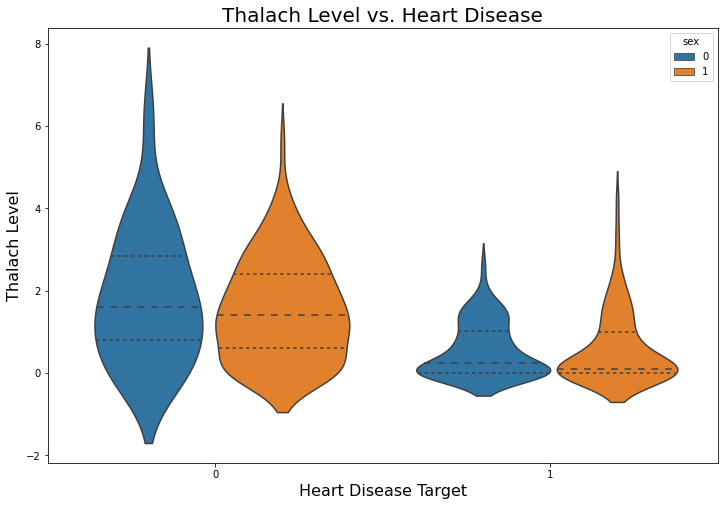

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

We can see that the overall shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we dont see many differences between male & female target outcomes.

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

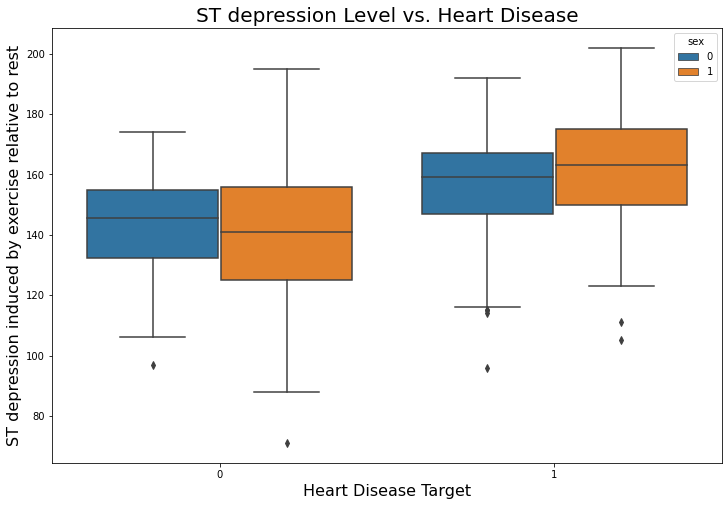

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

Positive patients exhibit a hightened median for ST depression level, while negative patients have lower levels. In addition, we dont see many differences between male & female target outcomes, expect for the fact that males have slightly larger ranges of ST Depression.

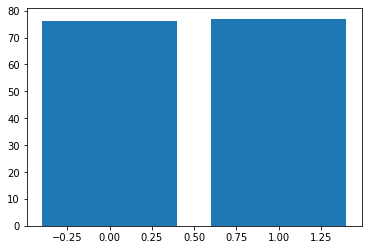

In [ ]:
plt.bar(x=data['sex'],height=data['age'])
plt.show()

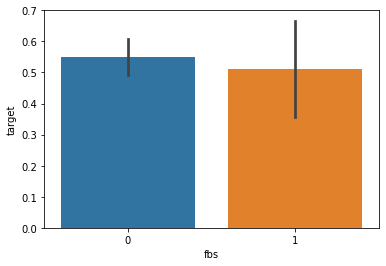

In [ ]:
sns.barplot(x="fbs",y="target",data=data)
plt.show()

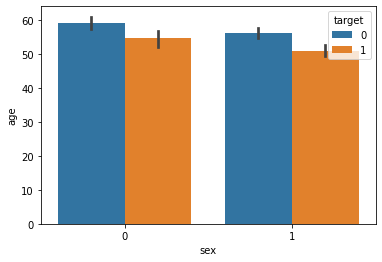

In [ ]:
sns.barplot(x=data['sex'],y=data['age'],hue=data['target'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


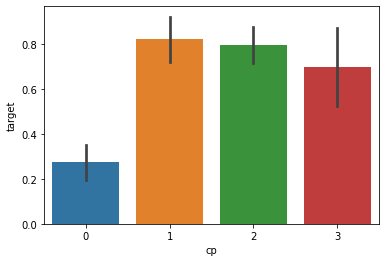

In [ ]:
sns.barplot(data['cp'],data['target'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


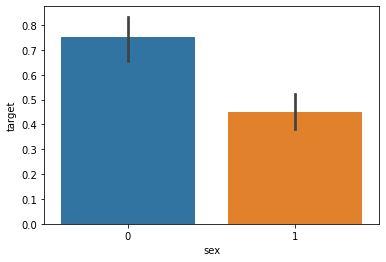

In [ ]:
sns.barplot(data['sex'],data['target'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Max heart rate of patients with heart disease')

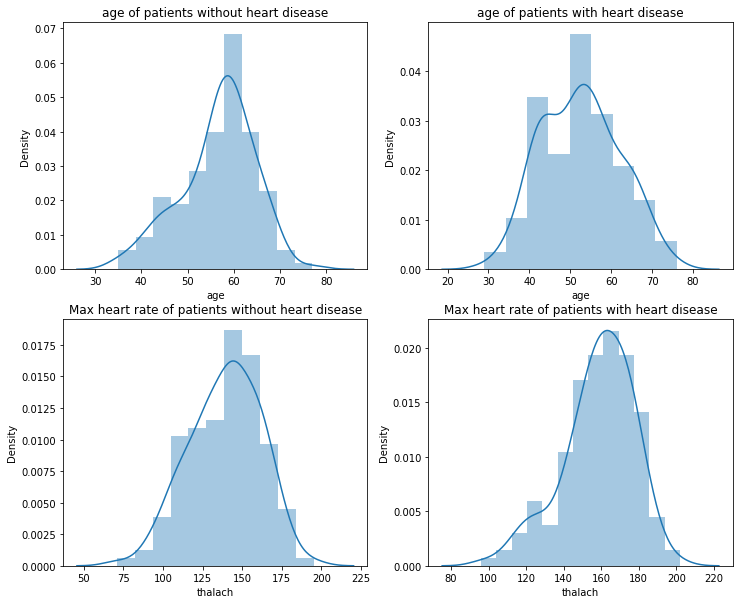

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data[data['target']==0].age)
plt.title('age of patients without heart disease')
plt.subplot(222)
sns.distplot(data[data['target']==1].age)
plt.title('age of patients with heart disease')
plt.subplot(223)
sns.distplot(data[data['target']==0].thalach)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(data[data['target']==1].thalach)
plt.title('Max heart rate of patients with heart disease')


In [ ]:
# Filtering data by positive Heart Disease patient 
pos_data = data[data['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [ ]:
# Filtering data by negative Heart Disease patient 
neg_data = data[data['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [ ]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.5830303030303029
(Negative Patients ST depression): 1.5855072463768118


In [ ]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))

(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623


From comparing positive and negative patients we can see there are vast differenes in means for many of our Features. From examing the details, we can observe that positive patients experience heightened maximum heart rate achieved (thalach) average. In addition, positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak).

# **Machine Learning AND Predictive Analytics**

Assign the 13 features to X, & the last column to our classification predictor, y

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Split: the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# **MODELING** **AND TRAINING**

We will now Train various Classification Models on the Training set & see which yields the highest accuracy. We will compare the accuracy of Logistic Regression, K-NN, SVM, Naives Bayes Classifier, Decision Trees, Random Forest, and XGBoost. Note: these are all supervised learning models.

# **MODEL-1 LOGISTIC REGRESSION**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1)
model1.fit(x_train, y_train) 

y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1)) 

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



# **MODEL 2 : K-NN (K-Nearest Neighbors)**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() 
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



# **Model 3: SVM (Support Vector Machine)**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) 
model3.fit(x_train, y_train) 
y_pred3 = model3.predict(x_test) 
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



# **MODEL-4: Naives Bayes Classifier**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() 
model4.fit(x_train, y_train) 
y_pred4 = model4.predict(x_test) 
print(classification_report(y_test, y_pred4)) 

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



# **Model 5: Decision Trees**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) 
model5.fit(x_train, y_train)  

y_pred5 = model5.predict(x_test) 
print(classification_report(y_test, y_pred5))


              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61




# **Model 6: Random Forest**

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)
model6.fit(x_train, y_train)  

y_pred6 = model6.predict(x_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



From comparing the 6 models, we can conclude that Model 6: Random Forest yields the highest accuracy. With an accuracy of 80%.

We have precision, recall, f1-score and support:

Precision : be "how many are correctly classified among that class"

Recall : "how many of this class you find over the whole number of element of this class"

F1-score : harmonic mean of precision and recall values. F1 score reaches its best value at 1 and worst value at 0. F1 Score = 2 x ((precision x recall) / (precision + recall))

Support: # of samples of the true response that lie in that class.

LETS WRITE CODE FOR CONFUSTION MARTIX TO SEE NO OF MIS CLASSIFICATIONS DONE IN MODEL-6

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]


0.8032786885245902

Hence if we calculate the accuracy its # Correct Predicted/ # Total. In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.

(TP + TN)/(TP + TN + FP + FN). (21+28)/(21+28+9+3) = 0.80 = 80% accuracy

Note: A good rule of thumb is that any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

Feature Importance provides a score that indicates how helpful each feature was in our model.

The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.

In [ ]:
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


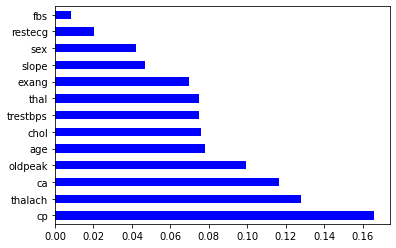

In [ ]:
index= data.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

From the Feature Importance graph above, we can conclude that the top 4 significant features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).



PREDICTING THE HEART DISEASE USING A USE CASE

Scenario: A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm.

He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.

In addition he has a serum cholestoral of 230 mg/dl.

He is fasting blood sugar > 120 mg/dl.

He has a resting electrocardiographic result of 1.

The patients maximum heart rate achieved is 140.

Also, he was exercise induced angina.

His ST depression induced by exercise relative to rest value was 2.2.

The slope of the peak exercise ST segment is flat.

He has no major vessels colored by fluoroscopy, and in addition his maximum heart rate achieved is a reversable defect.

Based on this information, can we classify this patient with Heart Disease?

In [ ]:
print(model6.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


Yes, Our machine learning algorithm has classified this patient with Heart Disease. Now we can properly diagnose him, & get him the help he needs to recover. By diagnosing him early, we may prevent worse symtoms from arising later.

In [ ]:

y_pred = model6.predict(x_test)
print(y_pred)

[0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1]


Text(0.5, 1.0, 'Accuracy')

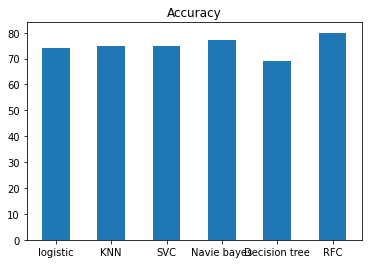

In [ ]:
import numpy as np
algos=["logistic","KNN","SVC","Navie bayes","Decision tree","RFC"]
accuracy=[74,75,75,77,69,80]
xpos=np.arange(len(algos))
plt.bar(xpos,accuracy,width=0.5,align="center")
plt.xticks(xpos,algos)
plt.title("Accuracy")


# **CONCLUSIONS**

Our Random Forest algorithm yields the highest accuracy, 80%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).



Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symtoms from arising later.